In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [89]:
%matplotlib notebook

In [90]:
%matplotlib qt

In [91]:
class Deformation_map():
    def __init__(self,path,fname) :
        self.xtrim = 0
        self.ytrim = 0
        self.path = path
        self.fname = fname
        
        file = open(self.path+'/'+self.fname,encoding='iso-8859-1')
        self.data = np.loadtxt(file, skiprows=1, delimiter=',')
        
        self.xc = self.data[:,0]
        self.yc = self.data[:,1]
        self.xd = self.data[:,2]
        self.yd = self.data[:,3]
        
        binning_x = min(abs(np.diff(self.xc)))
        binning_y = max(abs(np.diff(self.yc)))
        assert binning_x == binning_y
        assert binning_x % 1 == 0
        self.binning = int(binning_x)
        
        self.xdim = int((self.xc.max() - self.xc.min()) / binning_x) + 1
        self.ydim = int((self.yc.max() - self.yc.min()) / binning_y) + 1
        
#         self.x_map = self._map(self.xd)
#         self.y_map = self._map(self.yd)
        self.x_map, _ = self._map_wmissing(self.xd)
        self.y_map, _ = self._map_wmissing(self.yd)
        
        
        self.f11 = self._grad(self.x_map)[1]
        self.f22 = self._grad(self.y_map)[0]
        self.f12 = self._grad(self.x_map)[0]
        self.f21 = self._grad(self.y_map)[1]
        self.max_shear = np.sqrt((((self.f11-self.f22)/2.)**2) + ((self.f12+self.f21)/2.)**2)
        self.max_shear = self.max_shear[self.ytrim:-self.ytrim,self.xtrim:-self.xtrim]
        self.mapshape = np.shape(self.max_shear)
        
    def _map(self, data_col):
        data_map = np.reshape(np.array(data_col), (self.ydim, self.xdim))
        return data_map

    def _map_wmissing(self, data_col):
        data_map = np.full((self.ydim, self.xdim), np.nan)
        
        xc = self.xc - self.xc.min()
        yc = self.yc - self.yc.min()
        
        locs = []
        
        for val, x, y in zip(data_col, xc, yc):
            loc = tuple(int(d / self.binning) for d in (x, y))
            if loc in locs:
                print("Multiple data values for 1 point.")
            else:
                locs.append(loc)

            data_map[loc[1], loc[0]] = val
        
        return data_map, locs

    def _grad(self,data_map) :
        data_grad = np.gradient(data_map, self.binning, self.binning)
        return data_grad

In [92]:
f_list=[]
for num in range(1,222):
    fname = 'data_{:03}.csv'.format(num)
    defmap = Deformation_map('./Surfalex_All data/DIC data/Data/test 0-1/displacement data', fname)
    f_list.append(defmap)

In [93]:
def scrubF(measurement,fig):
    fmap1=f_list[measurement-1]
    fmap2=f_list[measurement]
    fmap3=f_list[measurement+1]
    average_data=(fmap1.f22+fmap2.f22+fmap3.f22)/3
    fig.set_data(average_data)
    plt.draw()

In [94]:
def scrubF_single(measurement,fig):
    fmap=f_list[measurement]
#   cropped_map=fmap.f22[10:24,16:22]
    cropped_map=fmap.f22

    fig.set_data(cropped_map)
    plt.draw()

<IPython.core.display.Javascript object>


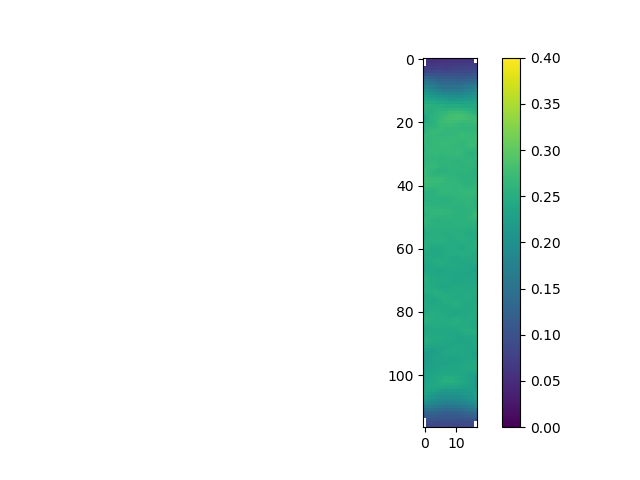

In [96]:
plt.figure()
fmap=f_list[0].f22
#cropped_map=fmap[10:24,16:22]
fig1 = plt.imshow(fmap,vmin=0,vmax=0.4,cmap='viridis',interpolation='none')
plt.colorbar()
plt.show()

In [97]:
interactive(scrubF_single,measurement=(0,np.size(f_list)-2,1),fig=fixed(fig1))

interactive(children=(IntSlider(value=109, description='measurement', max=219), Output()), _dom_classes=('widg…

In [100]:
defmap=f_list[100]
rho=-defmap.f11/defmap.f22
# rho is the shape change -deyy/dexx


<IPython.core.display.Javascript object>


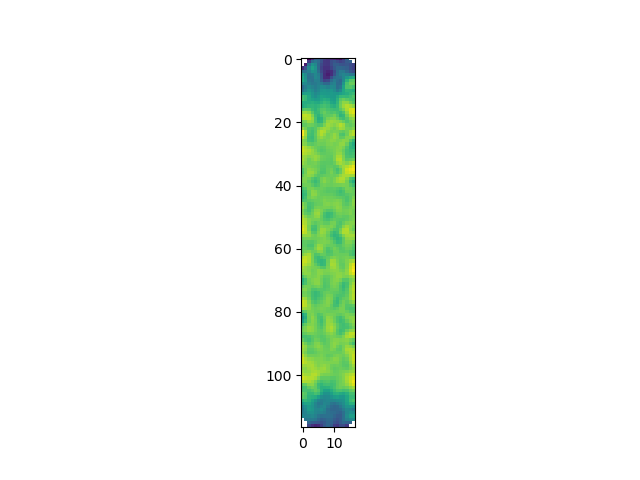

In [101]:
plt.imshow(rho)
plt.show()

In [102]:
def_map=f_list[0]
def_map.f22.shape

(117, 17)

In [103]:
strain_list=[]
for def_map in f_list:
    cropped_map=def_map.f22[10:24,1:12]
    
    strain_list.append(np.mean(cropped_map))

<IPython.core.display.Javascript object>


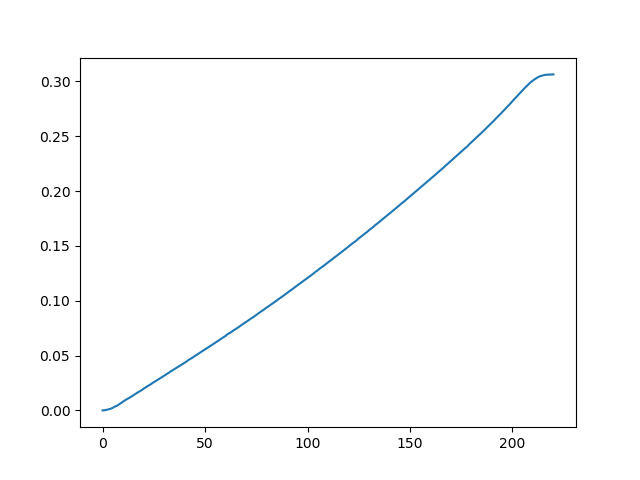

In [104]:
plt.figure()
plt.plot(strain_list)

<IPython.core.display.Javascript object>


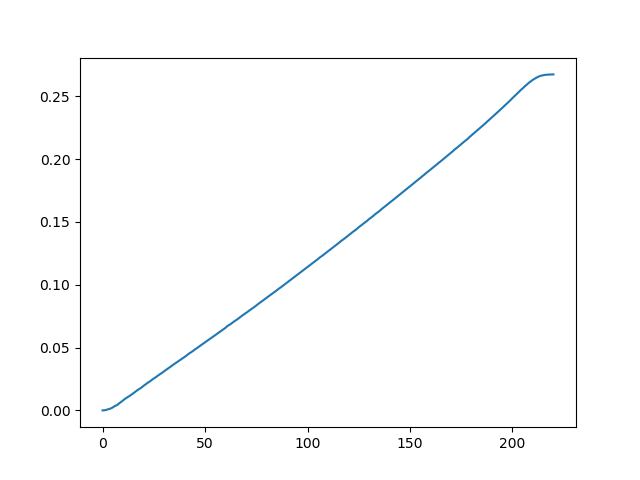

In [105]:
plt.figure()
true_strain=np.log(1+np.array(strain_list))
plt.plot(true_strain)

In [106]:
trans_list=[]
for def_map in f_list:
    cropped_map=def_map.f11[10:24,1:12]
    
    trans_list.append(np.mean(cropped_map))

<IPython.core.display.Javascript object>


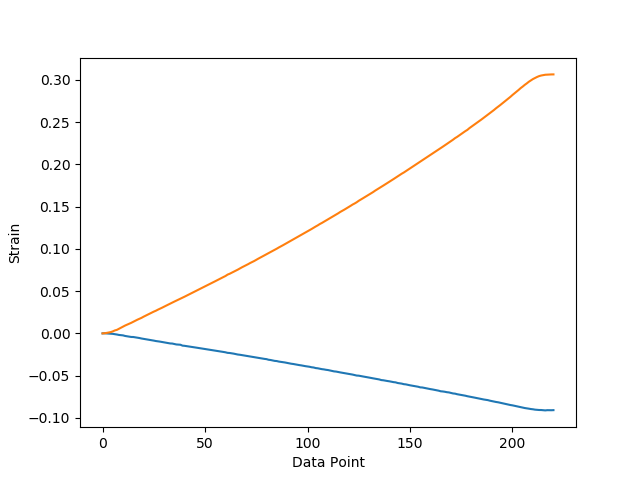

Text(0, 0.5, 'Strain')

In [107]:
plt.figure()
plt.plot(trans_list)
plt.plot(strain_list)
plt.xlabel('Data Point')
plt.ylabel('Strain')

In [108]:
strain_ratio = - np.array(trans_list)/np.array(strain_list)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [81]:
strain_list


[0.0,
 0.00012811338166137827,
 0.0005164192481474449,
 0.0010188229672320466,
 0.0015297343978634128,
 0.002371103035939204,
 0.003490520529932792,
 0.004154975228495412,
 0.005419805916872892,
 0.006634764702289136,
 0.00799380587292956,
 0.009271796337969892,
 0.010315495032768745,
 0.011328770278336167,
 0.012490523945201528,
 0.013737619078004514,
 0.015074532991879948,
 0.016204158981125077,
 0.017266543499835123,
 0.0183625332720868,
 0.019719808132617506,
 0.020925807333611823,
 0.022173043040486125,
 0.023211815450098608,
 0.02452556560565899,
 0.025744793012544707,
 0.0267762549511798,
 0.02805166182579932,
 0.029176762816193816,
 0.030333122649750154,
 0.031592578392524225,
 0.032778440822254534,
 0.033941582271030966,
 0.0351815669567554,
 0.03644050622915292,
 0.037593872516186205,
 0.03873717320429814,
 0.039886335893110796,
 0.041091444585230445,
 0.04227618428019734,
 0.043402731263792356,
 0.044646204911269145,
 0.046022285114635124,
 0.04709431660639775,
 0.0482700137

<IPython.core.display.Javascript object>


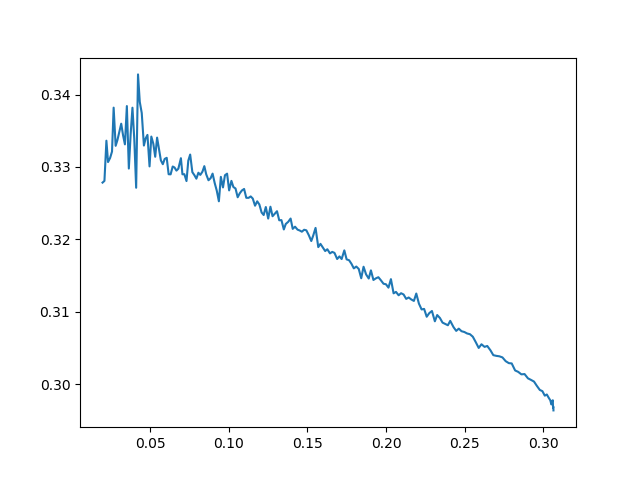

In [109]:
plt.figure()
plt.plot(strain_list[20:], strain_ratio[20:])

<IPython.core.display.Javascript object>


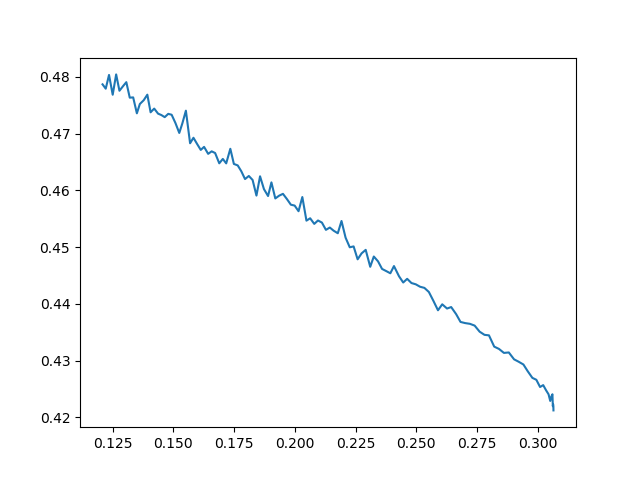

In [110]:
Lankford=strain_ratio/(1-strain_ratio)
plt.figure()
plt.plot(strain_list[100:], Lankford[100:])

<IPython.core.display.Javascript object>


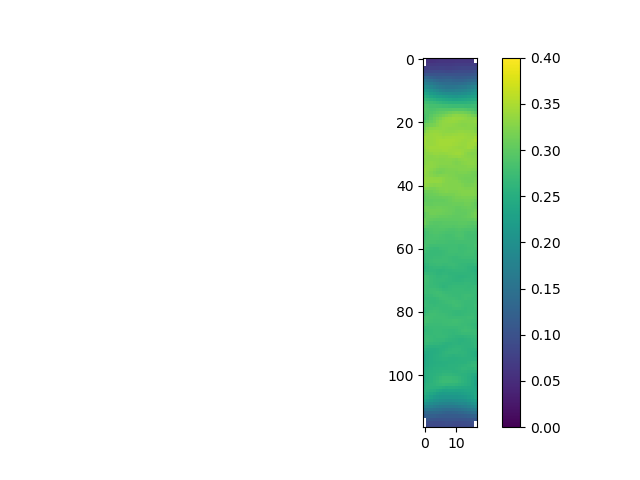

In [112]:
plt.figure()
fmap=f_list[200].f22
#cropped_map=fmap[10:24,16:22]
fig1 = plt.imshow(fmap,vmin=0,vmax=0.4,cmap='viridis',interpolation='none')
plt.colorbar()
plt.show()

In [57]:
plt.savefig("strain_plot.png")